In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##Question1

In [11]:
data={'Month':[0,1,2,3,4,5,6,7,8,9,10,11],'Max':[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],
'Min':[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]}
df=pd.DataFrame(data)

In [12]:
df

,Month,Max,Min
0,0,39,21
1,1,41,23
2,2,43,27
3,3,47,28
4,4,49,32
5,5,51,35
6,6,45,31
7,7,38,28
8,8,37,21
9,9,29,19


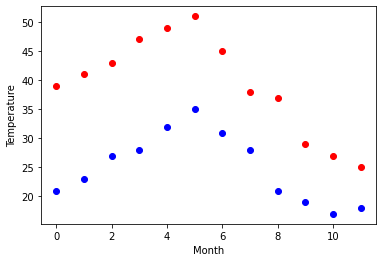

In [20]:
plt.scatter(df['Month'],df['Min'],c='blue')
plt.scatter(df['Month'],df['Max'],c='red')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

In [28]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [24]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

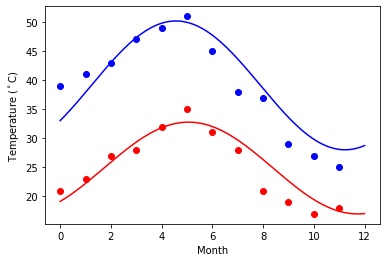

In [37]:
days = np.linspace(0, 12, num=365)
months=np.arange(12)

plt.figure()
plt.plot(months, temp_max, 'go',c='blue')
plt.plot(days, yearly_temps(days, *res_max), 'm-',c='blue')
plt.plot(months, temp_min, 'co',c='red')
plt.plot(days, yearly_temps(days, *res_min), 'y-',c='red')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [38]:
##Question2

In [41]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic=pd.read_csv(url)

In [42]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [56]:
d=titanic['sex'].value_counts()

<AxesSubplot:ylabel='sex'>

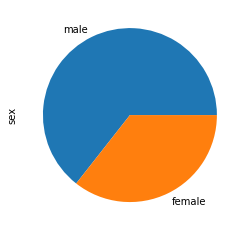

In [57]:
d.plot.pie()

<AxesSubplot:xlabel='age', ylabel='fare'>

<Figure size 432x288 with 0 Axes>

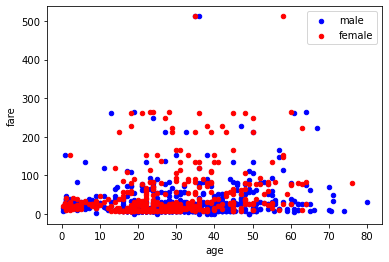

In [67]:
plt.figure() 
category1=titanic[titanic.sex=='male'].plot.scatter('age', 'fare', color='blue',label='male') 
titanic[titanic.sex=='female'].plot.scatter('age', 'fare',color='red',label='female',ax=category1)